# Beginner: Retrieve TESS Data Validation Products with Astroquery

In addition to producing light curves and target pixel files, TESS (Transiting Exoplanet Survey Satelite) searches the 2-minute light curve data for transiting exoplanets. For every star in the search that produces a significant transiting event, a set of Data Validation products are created. The set of products are:

- DV reports (pdf), one per star
- DV summaries (pdf), one per transit signal found
- DV mini-reports (pdf), one per star
- DV time series files (fits),  one per star, one extension per transit signal

In this tutorial we show how to use astroquery to request all of the DV files available for a star of interest (L98-59 in this case). We then open the DV time series file to plot the detrended light curves produced by the mission and also a folded light curve for each signal found by the mission.

Skills explored in this notebook:

- Retrieving TESS timeseries observations with astroquery
- Retrieving TESS Data Validation products with astroquery
- Reading in a DV FITS file with astropy.fits
- Plotting with Matplotlib

For more information about the DV time series files, see the notebook called "beginner_how_to_use_dvt". 

For more information about TESS data products, go to the [TESS Archive Manual](https://outerspace.stsci.edu/display/TESS)


---

## Import Statements

In [1]:
from astroquery.mast import Observations
from astroquery.mast import Catalogs
from astropy.io import fits
from astropy import table
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

## Use Astroquery to find Observations of L98-59
We begin by doing a cone search usig the `Observations.query_object` function and then filtering for time series observations made by TESS. This leaves us with just the TESS 2-minute cadence data observations. 

In [2]:
star_name = "L98-59"

observations = Observations.query_object(star_name,radius = "0 deg")
obs_wanted = (observations['dataproduct_type'] == 'timeseries') & (observations['obs_collection'] == 'TESS')
print( observations[obs_wanted]['obs_collection', 'project','obs_id'] )

obs_collection project                        obs_id                       
-------------- ------- ----------------------------------------------------
          TESS    TESS tess2018206190142-s0001-s0006-0000000307210830-00196
          TESS    TESS tess2018206190142-s0001-s0009-0000000307210830-00205
          TESS    TESS tess2018206190142-s0001-s0013-0000000307210830-00226
          TESS    TESS      tess2018234235059-s0002-0000000307210830-0121-s
          TESS    TESS      tess2018319095959-s0005-0000000307210830-0125-s
          TESS    TESS      tess2019032160000-s0008-0000000307210830-0136-s
          TESS    TESS      tess2019058134432-s0009-0000000307210830-0139-s
          TESS    TESS      tess2019085135100-s0010-0000000307210830-0140-s
          TESS    TESS      tess2019112060037-s0011-0000000307210830-0143-s
          TESS    TESS      tess2019140104343-s0012-0000000307210830-0144-s


## Use Astroquery to Dowload DV Products
Use `Observations.get_product_list` to get a list of data products associated with the observations of interest. Each individual observation is associated with several data products, only some of which are the DV products we are interested in. In this case we want those data products that have "productSubGroupDescription" set to either DVT, DVM, DVS or DVR.  

Next, we use `Observations.download_products` to download our selected data files.  This function returns a manifest, a table that contains the local path to the files that are downloaded.

In [3]:
data_products = Observations.get_product_list(observations[obs_wanted])

files_wanted = (data_products["productSubGroupDescription"] == "DVT") | \
                (data_products["productSubGroupDescription"] == "DVM") | \
                (data_products["productSubGroupDescription"] == "DVS") | \
                (data_products["productSubGroupDescription"] == "DVR")

print(data_products["productFilename"][files_wanted])
manifest = Observations.download_products(data_products[files_wanted])


                        productFilename                        
---------------------------------------------------------------
   tess2019114105919-s0001-s0006-0000000307210830-00196_dvm.pdf
   tess2018206190142-s0001-s0006-0000000307210830-00196_dvr.pdf
   tess2018206190142-s0001-s0006-0000000307210830-00196_dvr.xml
tess2018206190142-s0001-s0006-0000000307210830-01-00196_dvs.pdf
tess2018206190142-s0001-s0006-0000000307210830-02-00196_dvs.pdf
tess2018206190142-s0001-s0006-0000000307210830-03-00196_dvs.pdf
  tess2018206190142-s0001-s0006-0000000307210830-00196_dvt.fits
   tess2019135213217-s0001-s0009-0000000307210830-00205_dvm.pdf
   tess2018206190142-s0001-s0009-0000000307210830-00205_dvr.pdf
   tess2018206190142-s0001-s0009-0000000307210830-00205_dvr.xml
                                                            ...
tess2019113062933-s0011-s0011-0000000307210830-01-00214_dvs.pdf
tess2019113062933-s0011-s0011-0000000307210830-02-00214_dvs.pdf
tess2019113062933-s0011-s0011-0000000307

## Download Complete
You have now downloaded all the TESS DV products for this star and thier locations can be seen by printing the "Local Path" in the manifest.

In [4]:
print( manifest['Local Path'] )

                                                               Local Path                                                               
----------------------------------------------------------------------------------------------------------------------------------------
   ./mastDownload/TESS/tess2018206190142-s0001-s0006-0000000307210830-00196/tess2019114105919-s0001-s0006-0000000307210830-00196_dvm.pdf
   ./mastDownload/TESS/tess2018206190142-s0001-s0006-0000000307210830-00196/tess2018206190142-s0001-s0006-0000000307210830-00196_dvr.pdf
   ./mastDownload/TESS/tess2018206190142-s0001-s0006-0000000307210830-00196/tess2018206190142-s0001-s0006-0000000307210830-00196_dvr.xml
./mastDownload/TESS/tess2018206190142-s0001-s0006-0000000307210830-00196/tess2018206190142-s0001-s0006-0000000307210830-01-00196_dvs.pdf
./mastDownload/TESS/tess2018206190142-s0001-s0006-0000000307210830-00196/tess2018206190142-s0001-s0006-0000000307210830-02-00196_dvs.pdf
./mastDownload/TESS/tess2018206190142-s00

## Examine the Download Manifest

TESS file names tell you a lot about what is in the file. In the function `parse_manifest` below I break them apart so that I can make an easy to read table about the type of data that we downloaded.  Then we write-out that part of the table.   This makes it obvious that there are lots of different sets of DV files based on different searches, each with a different sector range.  For each sector it was observed, there is a single sector search, and then there are also several multi sector searches.

In [5]:
def parse_manifest(manifest):
    """
    Parse manifest and add back columns that are useful for TESS DV exploration.
    """
    results = deepcopy(manifest)
    filenames = []
    sector_range = []
    exts = []
    for i,f in enumerate(manifest['Local Path']):
        file_parts = np.array(np.unique(f.split(sep = '-')))
        sectors = list( map ( lambda x: x[0:2] == 's0', file_parts))
        s1 = file_parts[sectors][0]
        try:
            s2 = file_parts[sectors][1]
        except:
            s2 = s1
        sector_range.append("%s-%s" % (s1,s2))
        path_parts = np.array(f.split(sep = '/'))
        filenames.append(path_parts[-1])
        exts.append(path_parts[-1][-8:])

    results.add_column(table.Column(name = "filename", data = filenames))
    results.add_column(table.Column(name = "sectors", data = sector_range))
    results.add_column(table.Column(name = "fileType", data = exts))
    results.add_column(table.Column(name = "index", data = np.arange(0,len(manifest))))
    
    return results

#Run parser and print
results = parse_manifest(manifest)
print(results['index','sectors','fileType'])

index   sectors   fileType
----- ----------- --------
    0 s0001-s0006 _dvm.pdf
    1 s0001-s0006 _dvr.pdf
    2 s0001-s0006 _dvr.xml
    3 s0001-s0006 _dvs.pdf
    4 s0001-s0006 _dvs.pdf
    5 s0001-s0006 _dvs.pdf
    6 s0001-s0006 dvt.fits
    7 s0001-s0009 _dvm.pdf
    8 s0001-s0009 _dvr.pdf
    9 s0001-s0009 _dvr.xml
  ...         ...      ...
   57 s0011-s0011 _dvs.pdf
   58 s0011-s0011 _dvs.pdf
   59 s0011-s0011 _dvs.pdf
   60 s0011-s0011 dvt.fits
   61 s0012-s0012 _dvm.pdf
   62 s0012-s0012 _dvr.pdf
   63 s0012-s0012 _dvr.xml
   64 s0012-s0012 _dvs.pdf
   65 s0012-s0012 _dvs.pdf
   66 s0012-s0012 _dvs.pdf
   67 s0012-s0012 dvt.fits
Length = 68 rows


## Plot the DVT File
The time series data used to find the repeating transit signals (which are also known as Threshold Crossing events (TCEs)) is found in the dvt.fits files.  As you can see there is a dvt file. If we want the file with the most data, we should pick the one with the longest sector range in the file name.  In this case it is s0001-s0013. 

In [6]:
print(results['index', 'sectors', 'fileType'][results['sectors'] == "s0001-s0013"])

index   sectors   fileType
----- ----------- --------
   14 s0001-s0013 _dvm.pdf
   15 s0001-s0013 _dvr.pdf
   16 s0001-s0013 _dvr.xml
   17 s0001-s0013 _dvs.pdf
   18 s0001-s0013 _dvs.pdf
   19 s0001-s0013 _dvs.pdf
   20 s0001-s0013 dvt.fits


### Plot the DV Median-Detrended Time Series
The median detrended fluxes are stored in the first extension under 'LC_DETREND'. This is a median detrended version of the light curve that was searched for transit signals. While in the continuous viewing zone, L98-59 was not observed during every sector so there will be gaps in our light curve.

In [7]:
# Locate the file that has the data
want = (results['sectors'] == "s0001-s0013") & (results['fileType'] == "dvt.fits")
dvt_filename = manifest[want]['Local Path'][0]

# Print out the file info
fits.info(dvt_filename)

Filename: ./mastDownload/TESS/tess2018206190142-s0001-s0013-0000000307210830-00226/tess2018206190142-s0001-s0013-0000000307210830-00226_dvt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   ()      
  1  TCE_1         1 BinTableHDU     92   236344R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  2  TCE_2         1 BinTableHDU     92   236344R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  3  TCE_3         1 BinTableHDU     92   236344R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  4  Statistics    1 BinTableHDU    157   236344R x 38C   [D, E, J, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


Text(0.5, 1.0, 'Data Validation Detrended Light Curve for L98-59')

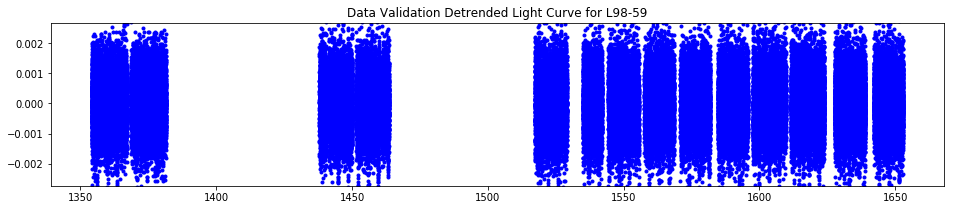

In [8]:
# Plot the detrended photometric time series in the first binary table. 
data = fits.getdata(dvt_filename, 1)
time = data['TIME']
relflux = data['LC_DETREND']

plt.figure(figsize = (16,3))
plt.plot (time, relflux, 'b.')
plt.ylim(1.2* np.nanpercentile(relflux, .5) , 1.2 * np.nanpercentile(relflux, 99.5))
plt.title('Data Validation Detrended Light Curve for %s' % (star_name))

### Plot Folded Light Curve
Each extension of the DVT data file contains a separate TCE. After the pipeline finds a set of transits, the transits are removed and the light curve is once again searched for transits.  L98-59 has three TCEs, each is consistent with the three confirmed planets found around this star.  Here we plot the phase folded light curve for each TCE, each as its own subplot.  The DVT file also contains a transit model as one of the columns in the FITS table. We overplot that in orange.

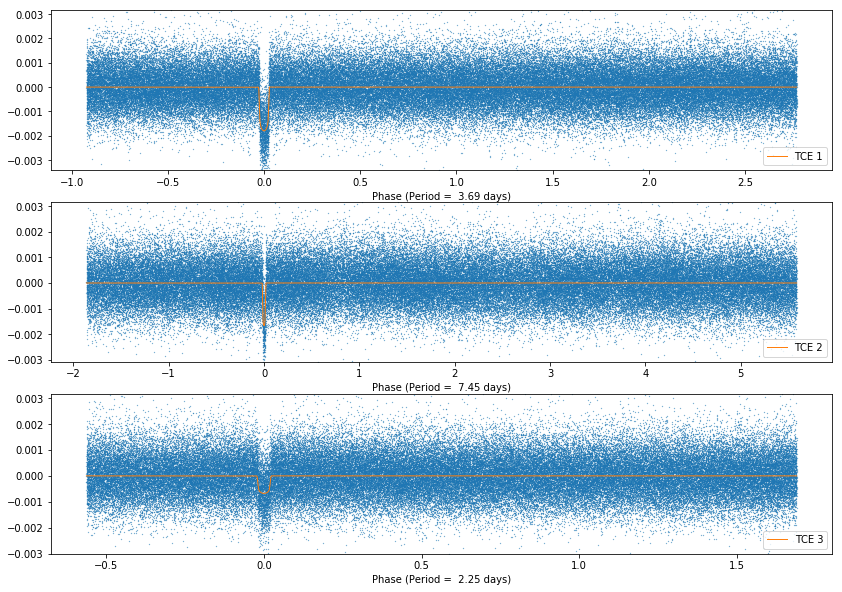

In [9]:
def plot_folded(phase, data, model, ext, period):
    isort = phase.argsort()
    
    plt.plot(phase[isort], data[isort], '.', ms = .5)
    plt.plot(phase[isort], model[isort], '-', lw = 1, label = "TCE %i" % ext)
    plt.xlabel('Phase (Period = %5.2f days)' % period)
    plt.ylim(1.5 * np.nanpercentile(data, .5) , 1.4 * np.nanpercentile(data,99.5))
    plt.legend(loc = "lower right")

plt.figure(figsize = (14,10))

nTCEs = fits.getheader(dvt_filename)['NEXTEND'] - 2

for ext in range(1, nTCEs + 1):
    data = fits.getdata(dvt_filename, ext)
    head = fits.getheader(dvt_filename, ext)
    period = head['TPERIOD']
    phase = data['PHASE']
    flux = data['LC_INIT']
    model = data['MODEL_INIT']
    plt.subplot(3, 1, ext)
    plot_folded(phase, flux, model, ext, period)

<a id="about_ID"></a>
## About this Notebook
**Authors:** 
<br>Susan E. Mullally, STScI 
<br>**Updated On:** 2019-09-13

[Top of Page](#title_ID)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="STScI logo" width="200px"/> 